# Importing Libraries & Dataset

In [3]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plot 
from jupyterthemes import jtplot 
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False) 


In [5]:
tweets_df = pd.read_csv('twitter.csv')

In [6]:
tweets_df

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
...,...,...,...
31957,31958,0,ate @user isz that youuu?ðððððð...
31958,31959,0,to see nina turner on the airwaves trying to...
31959,31960,0,listening to sad songs on a monday morning otw...
31960,31961,1,"@user #sikh #temple vandalised in in #calgary,..."


In [8]:
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


In [10]:
tweets_df.describe()

,id,label
count,31962.000000,31962.000000
mean,15981.500000,0.070146
std,9226.778988,0.255397
min,1.000000,0.000000
25%,7991.250000,0.000000
50%,15981.500000,0.000000
75%,23971.750000,0.000000
max,31962.000000,1.000000


In [12]:
tweets_df['tweet']

0         @user when a father is dysfunctional and is s...
1        @user @user thanks for #lyft credit i can't us...
2                                      bihday your majesty
3        #model   i love u take with u all the time in ...
4                   factsguide: society now    #motivation
                               ...                        
31957    ate @user isz that youuu?ðððððð...
31958      to see nina turner on the airwaves trying to...
31959    listening to sad songs on a monday morning otw...
31960    @user #sikh #temple vandalised in in #calgary,...
31961                     thank you @user for you follow  
Name: tweet, Length: 31962, dtype: object

=> The "id" column isn't adding much when it comes to training and testing the model, so we will drop it

In [18]:
#Creating s data subset
tweets_df_susbet = tweets_df[["id","label","tweet"]]

In [19]:
tweets_df_susbet = tweets_df_susbet.drop(['id'], axis=1)
tweets_df_susbet

,label,tweet
0,0,@user when a father is dysfunctional and is s...
1,0,@user @user thanks for #lyft credit i can't us...
2,0,bihday your majesty
3,0,#model i love u take with u all the time in ...
4,0,factsguide: society now #motivation
...,...,...
31957,0,ate @user isz that youuu?ðððððð...
31958,0,to see nina turner on the airwaves trying to...
31959,0,listening to sad songs on a monday morning otw...
31960,1,"@user #sikh #temple vandalised in in #calgary,..."


# Data Exploration

<Axes: >

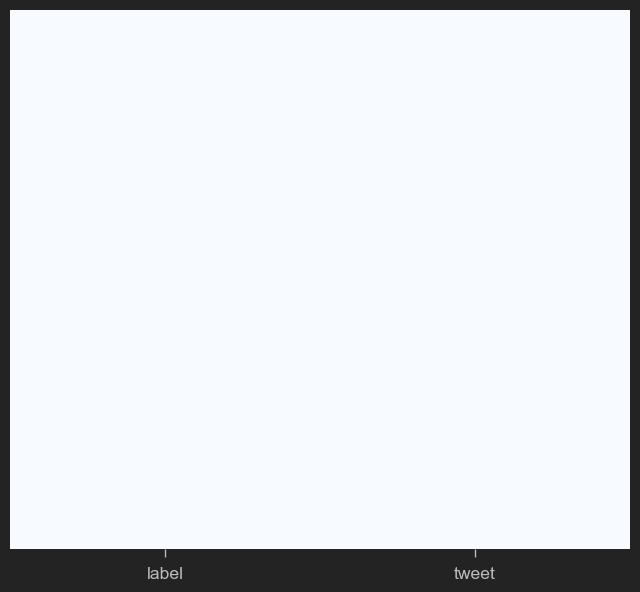

In [33]:
#find out of the dataframe has missing data
sns.heatmap(tweets_df_susbet.isnull(), yticklabels=False, cbar=False, cmap="Blues")

=> The empty histogram shows that we don't have any null or missing elements in our dataframe

array([[<Axes: title={'center': 'label'}>]], dtype=object)

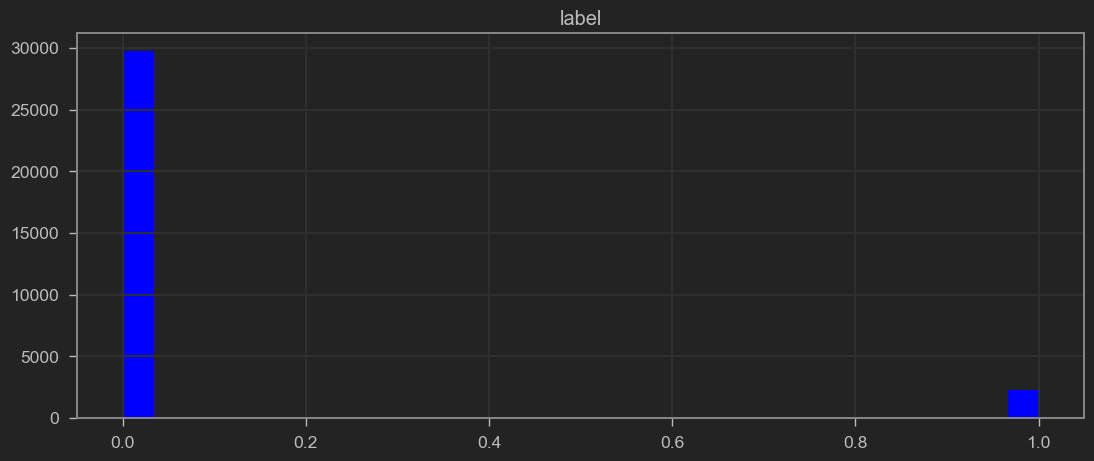

In [32]:
tweets_df_susbet.hist(bins=30, figsize=(13,5), color="Blue")
#we can do the same thing using countplot from seaborn
#sns.countplot(tweets_df_susbet['label'], label='count')

This histogram shows that we have two classes '0' and '1'.
It shows that I have about 30000 samples/tweets of class '1' and about 2300 samples/tweets of class '0'


=> This means that my dataset is unbalanced

In [35]:
#Looking for the length of the tweets in the dataframe
tweets_df_susbet['length']=tweets_df_susbet['tweet'].apply(len)
tweets_df_susbet

,label,tweet,length
0,0,@user when a father is dysfunctional and is s...,102
1,0,@user @user thanks for #lyft credit i can't us...,122
2,0,bihday your majesty,21
3,0,#model i love u take with u all the time in ...,86
4,0,factsguide: society now #motivation,39
...,...,...,...
31957,0,ate @user isz that youuu?ðððððð...,68
31958,0,to see nina turner on the airwaves trying to...,131
31959,0,listening to sad songs on a monday morning otw...,63
31960,1,"@user #sikh #temple vandalised in in #calgary,...",67


In [36]:
tweets_df_susbet.describe()

,label,length
count,31962.000000,31962.000000
mean,0.070146,84.739628
std,0.255397,29.455749
min,0.000000,11.000000
25%,0.000000,63.000000
50%,0.000000,88.000000
75%,0.000000,108.000000
max,1.000000,274.000000


In [40]:
#viewing the shortest tweet (legnth = 11)
tweets_df_susbet[ tweets_df_susbet['length'] == 11 ]['tweet']

25195    i love you 
Name: tweet, dtype: object

In [41]:
#viewing the shortest tweet (legnth = 274)
tweets_df_susbet[ tweets_df_susbet['length'] == 274 ]['tweet']

19770     @user lmfao pathetic #soit   #growup #funny #...
Name: tweet, dtype: object

In [46]:
#viewing the tweet with mean length (legnth = 84)
tweets_df_susbet[ tweets_df_susbet['length'] == 84 ]['tweet']

43       my mom shares the same bihday as @user   bihda...
220      g o a l s ð repost from @user #propey #ocea...
640      oscar tabarez talks luis suarezâs angry reac...
723       @user another hands &amp; feet complete!! ber...
742      because great things never came from comfo zon...
                               ...                        
31445    .@user on making choices to keep herself   as ...
31448    i'm a gordo. #passpo #florence #firenze #italy...
31509    just 3 keys that are found on your computer to...
31857    traveling happy #family   holidays #car #sunny...
31883    we spent #familytime by doing simple wefie, we...
Name: tweet, Length: 333, dtype: object

In [51]:
#view the first row
tweets_df_susbet[ tweets_df_susbet['length'] == 84 ]['tweet'].iloc[0]

'my mom shares the same bihday as @user   bihday snake! see you this weekend ð\x9f\x99\x8cð\x9f\x8f¼'

In [50]:
count = (tweets_df_susbet['length'] == 84 ).sum()
print("The number of rows where tweet length is 84 = ",count)

The number of rows where tweet length is 84 =  333


<Axes: ylabel='Frequency'>

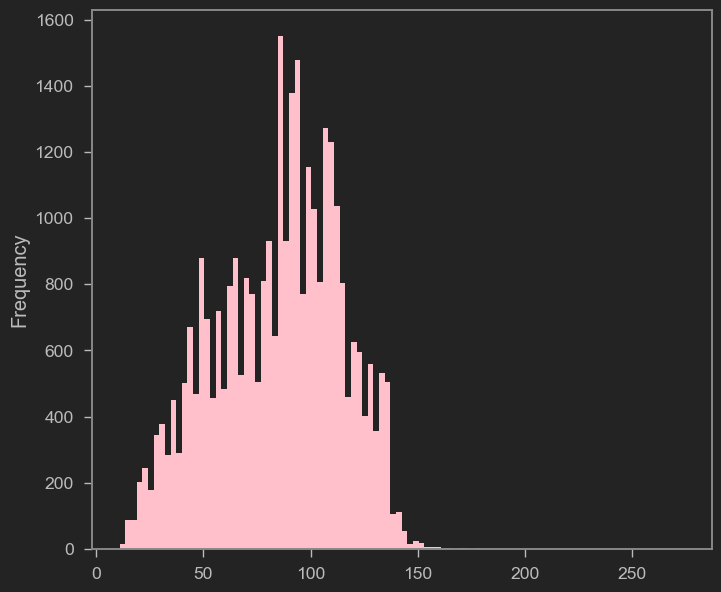

In [60]:
#plot the histogram of the length column
tweets_df_susbet['length'].plot(bins=100, kind="hist", color="Pink")

# Plotting the Wordcloud